In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import scipy.stats as stats

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from spearman_plotting_func import *

In [15]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

In [40]:
durations = pd.DataFrame([[4.0, 4.45, 5.05, 6.25], [4.6, 5.05, 5.65, 6.85], [4.95, 5.4, 6.0, 7.2], [6.0, 6.45, 7.05, 7.95]]
, ['03s','05s','1s','4s'], ['whole','two','three','ten'])

print(durations)

     whole   two  three   ten
03s   4.00  4.45   5.05  6.25
05s   4.60  5.05   5.65  6.85
1s    4.95  5.40   6.00  7.20
4s    6.00  6.45   7.05  7.95


In [7]:
def spearman_flip(params):
    param_names = ['tp', 'tc', 'iv2', 'pgd']
    colors = {'tp': '#7f58af', 'tc': '#e84d8a', 'iv2': '#64c5eb', 'pgd': '#7fb646'}
    colors_darker = {'tp': '#251A32', 'tc': '#5c2037', 'iv2': '#2b5160', 'pgd': '#39511f'}
    fig, axs = plt.subplots(2, 2, figsize = (12, 9))
    marker = ''
    for i, p in enumerate(params):
        print(i)
        param_name = param_names[i]

        res = [idx for idx, val in enumerate(p[4]) if val > 0.05]
        if len(res) > 0:
            flip = res[0]

        print(param_name, p[3][0], p[3][flip])


In [61]:
def spearman_durations(params, f):
    param_names = ['tp', 'tc', 'iv2', 'pgd']

    time = f[10:].split('_')[0]
    flip_mag = durations.loc[time].three
    flip = int((flip_mag-3)*10)
    for i, p in enumerate(params):
        print(i)
        param_name = param_names[i]
        print(param_name, p[3][0], p[3][flip])


In [62]:
%matplotlib inline
n_stations = 0
min_dist = 30
max_dist = 200
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database_hypo/{f}')
    # print(df.head(10))
    for n_stations in [0]:  # range(0,7):
        for min_dist in [0]:  # range(0, 100, 10):
            options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,**options)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,**options)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,**options)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,**options)


            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tp_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            tp_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tp']
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'tp', False)
            #if len(spearman)>0:
            #    print('tp', spearman[0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_pgd_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            pgd_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,  'pgd']
            #if len(spearman)>0:
            #    print('pgd', spearman[0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tc_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            tc_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tc']
            #if len(spearman)>0:
            #    print('tc', spearman[0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_iv2_mag_lim(df, mag_lim,**options)
                #print(len(x[y==0]))
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', False)
            iv2_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,'iv2']
            #if len(spearman)>0:
            #    print('iv2', spearman[0])

            spearman_durations([tp_params, tc_params, iv2_params, pgd_params], f)
            ##plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params)
            #plot_spearman_subplots_all_on_one_no_n_shaded_percent_var(f, tp_params, pgd_params, iv2_params, tc_params, log = False, save = True, **options)
            ##print(tp_params[4][0], tc_params[4][0])
            ##plot_spearman_subplots_all_on_one(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)



eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20
0
tp 0.4787708116760028 0.07452445092732975
1
tc 0.5572061023765785 0.11651186622525969
2
iv2 0.44732639520425554 0.23575905807133948
3
pgd 0.6089165968103959 0.18585848543815353
eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20
0
tp 0.5257459165887971 0.009379852177940746
1
tc 0.6859444463388383 0.1311214976101062
2
iv2 0.546661181167167 0.31656495161128834
3
pgd 0.7009132152553517 0.060738834763346815
eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20
0
tp 0.5496780154004132 -0.026699042858795076
1
tc 0.762588141665039 0.12967998902627015
2
iv2 0.6636591359076717 0.24298252003778667
3
pgd 0.7843421371281877 0.11663840398693325
eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20
0
tp 0.5589298354323806 0.5581918765903401
1
tc 0.7456101469456294 0.2318643179682951
2
iv2 0.7945765889796864 0.23349349809306955
3
pgd 0.8376397490811472 0.6123724356957946


In [50]:
spearman_durations([tp_params, tc_params, iv2_params, pgd_params], f)

0
tp 0.4787708116760028 0.1283553128575736
1
tc 0.5572061023765785 0.18434569944014823
2
iv2 0.44732639520425554 0.1803199157274888
3
pgd 0.6089165968103959 0.16754866536687543


0
tp 0.4787708116760028 -0.00690223119195241
1
tc 0.5572061023765785 0.042054221216125086
2
iv2 0.44732639520425554 0.13465957385565483
3
pgd 0.6089165968103959 0.0595413604345636


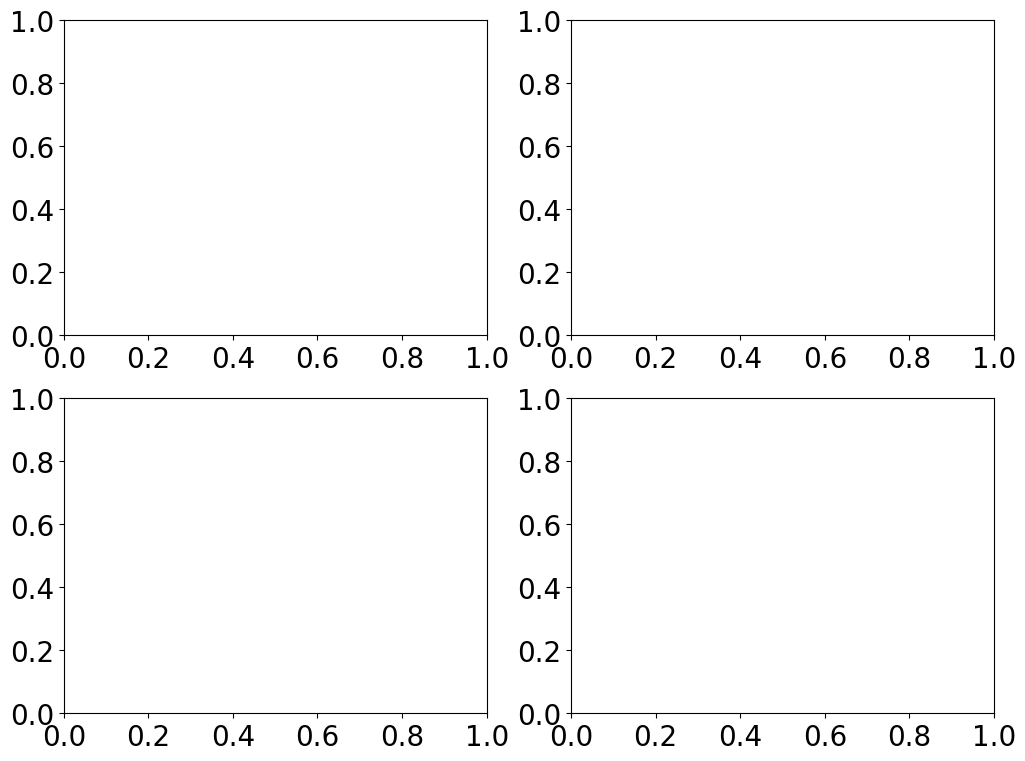

In [8]:
spearman_flip([tp_params, tc_params, iv2_params, pgd_params])

In [132]:
def test_overlap(p, param_name = ''):

    colors = {'tp': '#7f58af', 'tc': '#e84d8a', 'iv2': '#64c5eb', 'pgd': '#7fb646'}
    colors_darker = {'tp': '#251A32', 'tc': '#5c2037', 'iv2': '#2b5160', 'pgd': '#39511f'}

    param_color = colors[param_name]
    flip_color = colors_darker[param_name]
    res = [idx for idx, val in enumerate(p[4]) if val > 0.05]
    if len(res) > 0:
        flip = res[0]

    if p[0][flip] >= p[0][0]-p[1][0] and p[0][flip] <= p[0][0]+ p[1][0]:
        print('overlap at 1 s.d.')
        print(f'{p[0][flip]} in range [{p[0][0]-p[1][0]}, {p[0][0]+p[1][0]}]')
        marker = '1_'
    else:
        marker = '0_'
    if p[0][flip] >= p[0][0]-2*p[1][0] and p[0][flip] <= p[0][0]+2*p[1][0]:
        print('overlap at 2 s.d.')
        print(f'{p[0][flip]} in range [{p[0][0]-2*p[1][0]}, {p[0][0]+2*p[1][0]}]')
        marker = marker + '1'
    else:
        marker = marker + '0'
    if p[0][flip] <= p[0][0]-2*p[1][0] or p[0][flip] >= p[0][0]+2*p[1][0]:
        print('no overlap at 2 s.d')
        print(f'{p[0][flip]} NOT in range [{p[0][0]-2*p[1][0]}, {p[0][0]+2*p[1][0]}]')

    mu = p[0][0]
    sigma = p[1][0]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label = 'with all data', color = param_color)
    plt.fill_between(x, pdf, color = param_color, alpha = 0.5)
    plt.vlines(p[0][0], 0, max(pdf), color = param_color, linestyle = '-')

    difference_array = np.absolute(x-(p[0][0]-p[1][0]))
    index = difference_array.argmin()
    plt.vlines(p[0][0]-p[1][0], 0, pdf[index], color = param_color, linestyle = '--')
    plt.vlines(p[0][0]+p[1][0], 0, pdf[100-index], color = param_color, linestyle = '--')

    difference_array = np.absolute(x-(p[0][0]-2*p[1][0]))
    index = difference_array.argmin()
    plt.vlines(p[0][0]-2*p[1][0], 0, pdf[index], color = param_color, linestyle = ':')
    plt.vlines(p[0][0]+2*p[1][0], 0, pdf[100-index], color = param_color, linestyle = ':')

    mu = p[0][flip]
    sigma = p[1][flip]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label = 'at loss of significance', color = flip_color)
    plt.fill_between(x, pdf, color = flip_color, alpha = 0.5)
    plt.vlines(p[0][flip], 0, max(pdf), color = flip_color, linestyle = '-')

    difference_array = np.absolute(x-(p[0][flip]-p[1][flip]))
    index = difference_array.argmin()
    plt.vlines(p[0][flip]-p[1][flip], 0, pdf[index], color = flip_color, linestyle = '--')
    plt.vlines(p[0][flip]+p[1][flip], 0, pdf[100-index], color = flip_color, linestyle = '--')

    difference_array = np.absolute(x-(p[0][flip]-2*p[1][flip]))
    index = difference_array.argmin()
    plt.vlines(p[0][flip]-2*p[1][flip], 0, pdf[index], color = flip_color, linestyle = ':')
    plt.vlines(p[0][flip]+2*p[1][flip], 0, pdf[100-index], color = flip_color, linestyle = ':')
    plt.title(f'{param_name}, 1/2 s.d. {marker}, \n flip = {p[0][flip]:.4f}, \n 1 s.d. = [{p[0][0]-1*p[1][0]:.4f}, {p[0][0]+1*p[1][0]:.4f}], \n 2 s.d. = [{p[0][0]-2*p[1][0]:.4f}, {p[0][0]+2*p[1][0]:.4f}]')
    plt.legend()
    plt.savefig()
    plt.show()


In [180]:
def test_overlap_subplots(params):
    param_names = ['tp', 'tc', 'iv2', 'pgd']
    colors = {'tp': '#7f58af', 'tc': '#e84d8a', 'iv2': '#64c5eb', 'pgd': '#7fb646'}
    colors_darker = {'tp': '#251A32', 'tc': '#5c2037', 'iv2': '#2b5160', 'pgd': '#39511f'}
    fig, axs = plt.subplots(2, 2, figsize = (12, 9))
    marker = ''
    for i, p in enumerate(params):
        print(i)
        param_name = param_names[i]
        param_color = colors[param_name]
        flip_color = colors_darker[param_name]

        row, col = i//2, i%2


        res = [idx for idx, val in enumerate(p[4]) if val > 0.05]
        if len(res) > 0:
            flip = res[0]

        if p[0][flip] >= p[0][0]-p[1][0] and p[0][flip] <= p[0][0]+ p[1][0]:
            print('overlap at 1 s.d.')
            print(f'{p[0][flip]} in range [{p[0][0]-p[1][0]}, {p[0][0]+p[1][0]}]')
            marker = marker + '1_'
        else:
            marker = marker + '0_'
        if p[0][flip] >= p[0][0]-2*p[1][0] and p[0][flip] <= p[0][0]+2*p[1][0]:
            print('overlap at 2 s.d.')
            print(f'{p[0][flip]} in range [{p[0][0]-2*p[1][0]}, {p[0][0]+2*p[1][0]}]')
            marker = marker + '1_'
        else:
            marker = marker + '0_'
        if p[0][flip] <= p[0][0]-2*p[1][0] or p[0][flip] >= p[0][0]+2*p[1][0]:
            print('no overlap at 2 s.d')
            print(f'{p[0][flip]} NOT in range [{p[0][0]-2*p[1][0]}, {p[0][0]+2*p[1][0]}]')

        mu = p[0][0]
        sigma = p[1][0]
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        pdf = stats.norm.pdf(x, mu, sigma)
        axs[row][col].plot(x, pdf, label = 'with all data', color = param_color)
        axs[row][col].fill_between(x, pdf, color = param_color, alpha = 0.5)
        axs[row][col].vlines(p[0][0], 0, max(pdf), color = param_color, linestyle = '-')

        difference_array = np.absolute(x-(p[0][0]-p[1][0]))
        index = difference_array.argmin()
        axs[row][col].vlines(p[0][0]-p[1][0], 0, pdf[index], color = param_color, linestyle = '--')
        axs[row][col].vlines(p[0][0]+p[1][0], 0, pdf[100-index], color = param_color, linestyle = '--')

        difference_array = np.absolute(x-(p[0][0]-2*p[1][0]))
        index = difference_array.argmin()
        axs[row][col].vlines(p[0][0]-2*p[1][0], 0, pdf[index], color = param_color, linestyle = ':')
        axs[row][col].vlines(p[0][0]+2*p[1][0], 0, pdf[100-index], color = param_color, linestyle = ':')

        mu = p[0][flip]
        sigma = p[1][flip]
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        pdf = stats.norm.pdf(x, mu, sigma)
        axs[row][col].plot(x, pdf, label = 'at loss of significance', color = flip_color)
        axs[row][col].fill_between(x, pdf, color = flip_color, alpha = 0.5)
        axs[row][col].vlines(p[0][flip], 0, max(pdf), color = flip_color, linestyle = '-')

        difference_array = np.absolute(x-(p[0][flip]-p[1][flip]))
        index = difference_array.argmin()
        axs[row][col].vlines(p[0][flip]-p[1][flip], 0, pdf[index], color = flip_color, linestyle = '--')
        axs[row][col].vlines(p[0][flip]+p[1][flip], 0, pdf[100-index], color = flip_color, linestyle = '--')

        difference_array = np.absolute(x-(p[0][flip]-2*p[1][flip]))
        index = difference_array.argmin()
        axs[row][col].vlines(p[0][flip]-2*p[1][flip], 0, pdf[index], color = flip_color, linestyle = ':')
        axs[row][col].vlines(p[0][flip]+2*p[1][flip], 0, pdf[100-index], color = flip_color, linestyle = ':')
        axs[row][col].set_xlabel(f'{param_name}')#, 1/2 s.d. {marker}, \n flip = {p[0][flip]:.4f}, \n 1 s.d. = [{p[0][0]-1*p[1][0]:.4f}, {p[0][0]+1*p[1][0]:.4f}], \n 2 s.d. = [{p[0][0]-2*p[1][0]:.4f}, {p[0][0]+2*p[1][0]:.4f}]')
        axs[row][col].legend()
    # fig.plot([], [], color='k', label='significant')
    # fig.plot([], [], color='k', linestyle=':', label='insignificant')
    # fig.legend()
    fig.suptitle('overlap: ' + marker[:-1])
    fig.tight_layout()
    fig.savefig(f'/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/figures/overlaps/hypocentral/{f}_overlap_{marker[:-1]}.png')
    plt.show()


0
no overlap at 2 s.d
0.001181110149014914 NOT in range [0.13206216061128478, 0.14988482210683163]
1
no overlap at 2 s.d
0.10901469707168727 NOT in range [0.1875676128272065, 0.20737445444124544]
2
no overlap at 2 s.d
0.5645216910242055 NOT in range [0.7270423736904261, 0.7688694282990918]
3
no overlap at 2 s.d
0.20647610766408184 NOT in range [0.48616725020786916, 0.5059281693899087]


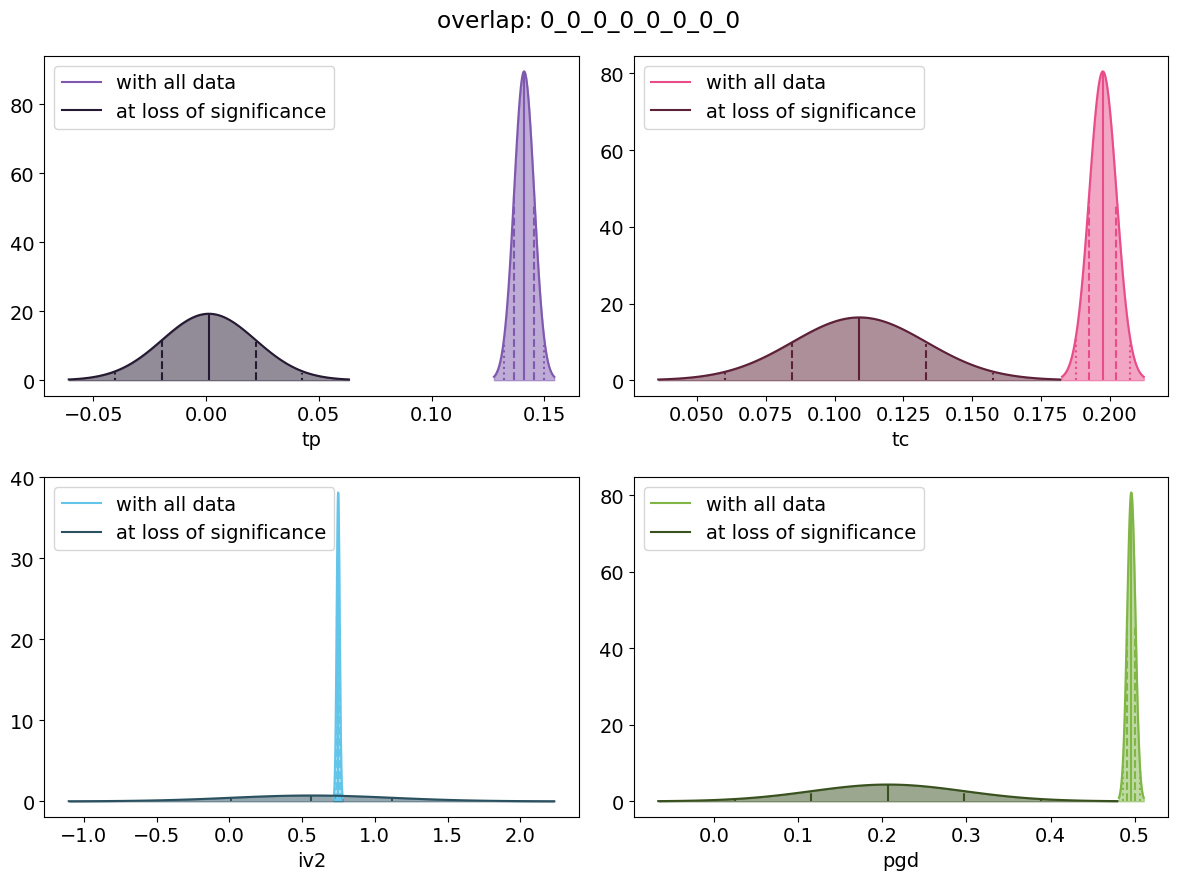

In [181]:
test_overlap_subplots([tp_params, tc_params, iv2_params, pgd_params])

In [182]:
import os

In [184]:
filenames = os.listdir('/Users/rebecca/Documents/PhD/Research/Frequency/data/results_database_hypo/')

In [185]:
filenames

['eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20',
 'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
 'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
 'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
 'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20',
 'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
 'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
 'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
 'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
 'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
 'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
 'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
 'mkdir',
 'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
 'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20',
 'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
 'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
 'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_sn

In [187]:
for n_stations in range(4,7):
    for min_dist in range(0, 100, 10):
        print(n_stations, min_dist)

4 0
4 10
4 20
4 30
4 40
4 50
4 60
4 70
4 80
4 90
5 0
5 10
5 20
5 30
5 40
5 50
5 60
5 70
5 80
5 90
6 0
6 10
6 20
6 30
6 40
6 50
6 60
6 70
6 80
6 90
